In [2]:
import mujoco
import mediapy as media

In [13]:
robot = mujoco.MjModel.from_xml_path("assets/scene.xml")
data = mujoco.MjData(robot)

""

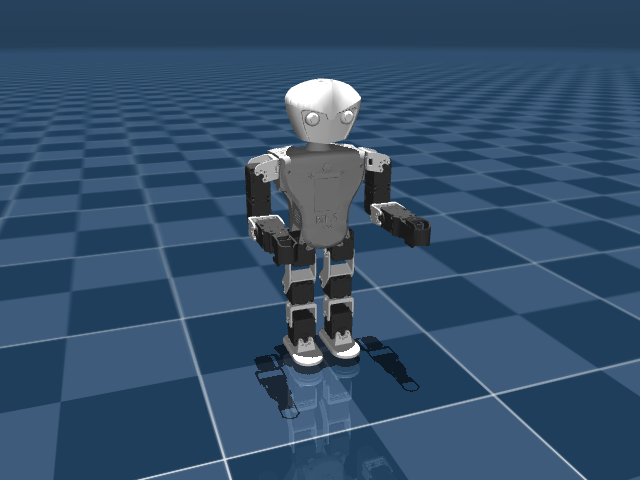

In [14]:
with mujoco.Renderer(model=robot, height=480, width=640) as renderer:
    mujoco.mj_forward(robot, data)
    renderer.update_scene(data)
    media.show_image(renderer.render())

In [5]:
print('Total number of DoFs in the model:', robot.nv)
print('Generalized positions:', data.qpos)
print('Generalized velocities:', data.qvel)

Total number of DoFs in the model: 24
Generalized positions: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Generalized velocities: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [21]:
duration = 4    # (seconds)
framerate = 24  # (Hz)

# Simulate and display video.
frames = []
mujoco.mj_resetDataKeyframe(robot, data, 0)  # Reset the state to keyframe 0
with mujoco.Renderer(robot) as renderer:
  while(1):
    if (data.time > duration):
      break
    mujoco.mj_step(robot, data)
    if (len(frames) < data.time * framerate):
      renderer.update_scene(data)
      pixels = renderer.render()
      frames.append(pixels)

media.show_video(frames, fps=framerate)

In [8]:
mujoco.mj_resetDataKeyframe(robot, data, 0)

In [13]:
data.time

0.002

In [10]:
mujoco.mj_step(robot, data)

In [11]:
data.qpos

array([ 1.26181175e-04, -2.53228514e-03, -5.15376993e-08, -1.39846986e-22,
        1.31050853e-06, -3.05455967e-04, -4.20197277e-21,  3.55021531e-06,
        1.76015314e-22, -1.31688428e-06, -3.10544042e-04, -3.71869252e-21,
        3.47127958e-02,  1.93713127e-04,  4.23172613e-04, -4.47457665e-05,
       -2.23713853e-05, -1.08460105e-03,  1.27196622e-02,  1.86089421e-04,
        3.92421091e-04, -1.63942692e-05,  8.34144398e-05, -3.97425754e-04])